In [1]:
import pandas as pd
#from JAS.models.gradient_optmization import sir
from JAS.models.genetic_optmization import sir
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv")
data.head()
data["date"] = pd.to_datetime(data["date"])

In [3]:
data = data[data["state"] == "SP"]
data["day"] = range(1,len(data["totalCases"]) + 1)

In [4]:
sir = sir.start_model(pop = 44639899)

In [5]:
sir.fit(x = data["day"],
        y = data["totalCases"],
        ncores = -1,
        maxiter = 100,
        seed = 17)

In [6]:
data["predicted"] = sir.predict(time = data["day"])

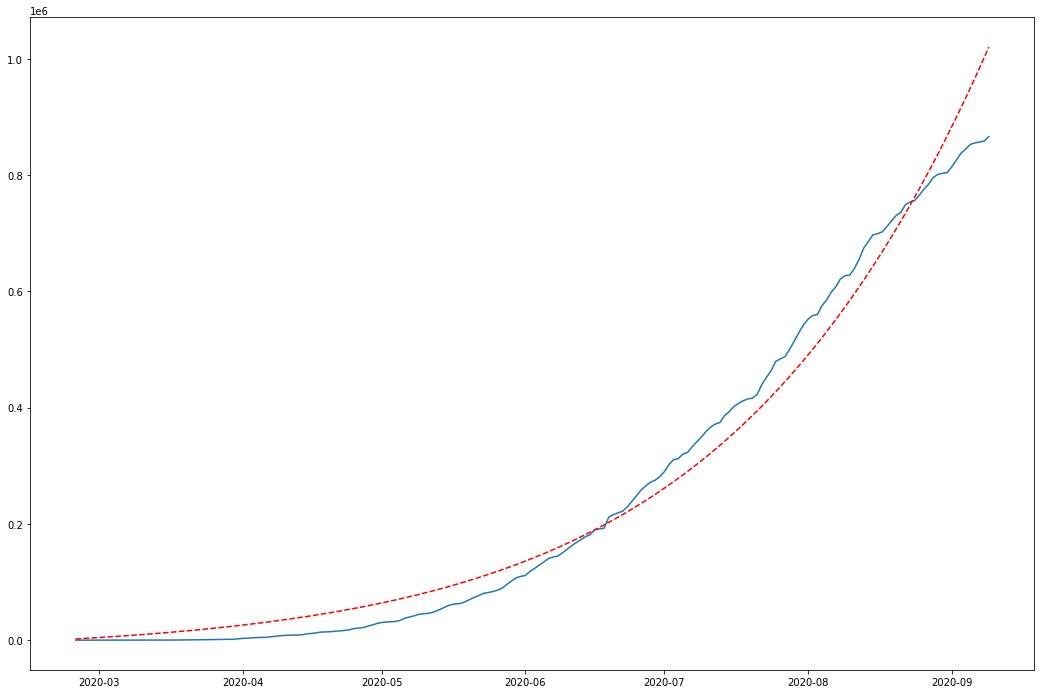

In [7]:
_, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [18,12])
ax.plot(data["date"], data["totalCases"])
ax.plot(data["date"], data["predicted"], "r--")

In [8]:
#_, ax = plt.subplots(nrows = 1, ncols = 1, figsize = [18,12])
#ax.plot(data["date"], sir.S, "g")
#ax.plot(data["date"], sir.I, "r")
#ax.plot(data["date"], sir.R, "b")
#plt.axvline(x = data["date"].iloc[int(sir.t1 - 1)], ymin = 0, ymax = 1)

In [9]:
#(0.24943946538764605, 0.19999999999999998)